In [71]:
!pip install xmltodict

In [89]:
import os
from pathlib import Path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

import xmltodict
# XML을 json처럼 parsing
from tqdm.auto import tqdm
# 오래걸리는 반복문 시각화

In [73]:
# plt.style.use(['seaborn-white'])

# 경로는 알아서 ㅎㅎ
PATH = '/content/drive/MyDrive/Colab Notebooks/mask_dataset'

# path에 파일을 확인
os.listdir(PATH)

"""
Prediction
['images', 'annotations']
"""

"\nPrediction\n['images', 'annotations']\n"

In [103]:
# 라벨(어노테이션)과 이미지의 경로를 지정
ANNOTATION_PATH = os.path.join(PATH, "annotations")
IMAGE_PATH = os.path.join(PATH, "images")

'/content/drive/MyDrive/Colab Notebooks/mask_dataset/annotations'

In [75]:
# path에 파일을 확인
os.listdir(ANNOTATION_PATH)[:30]
# os.listdir(IMAGE_PATH)[:10]

# 정렬이 필요하다!

['maksssksksss443.xml',
 'maksssksksss431.xml',
 'maksssksksss455.xml',
 'maksssksksss457.xml',
 'maksssksksss460.xml',
 'maksssksksss440.xml',
 'maksssksksss45.xml',
 'maksssksksss452.xml',
 'maksssksksss442.xml',
 'maksssksksss435.xml',
 'maksssksksss472.xml',
 'maksssksksss469.xml',
 'maksssksksss479.xml',
 'maksssksksss463.xml',
 'maksssksksss488.xml',
 'maksssksksss489.xml',
 'maksssksksss471.xml',
 'maksssksksss465.xml',
 'maksssksksss461.xml',
 'maksssksksss475.xml',
 'maksssksksss474.xml',
 'maksssksksss464.xml',
 'maksssksksss482.xml',
 'maksssksksss467.xml',
 'maksssksksss49.xml',
 'maksssksksss466.xml',
 'maksssksksss48.xml',
 'maksssksksss485.xml',
 'maksssksksss47.xml',
 'maksssksksss476.xml']

In [76]:

# sort의 기준을 찾자.

os.listdir(ANNOTATION_PATH)[10]
# print : 'maksssksksss472.xml'
# type : str

# . 이하를 버림
os.listdir(ANNOTATION_PATH)[10].split(".")
# Print : ['maksssksksss472', 'xml']

os.listdir(ANNOTATION_PATH)[10].split(".")[0]
# print : maksssksksss472
os.listdir(ANNOTATION_PATH)[6].split(".")[0]
# print : maksssksksss45

os.listdir(ANNOTATION_PATH)[10].split(".")[0][12:]
# print : 472
os.listdir(ANNOTATION_PATH)[6].split(".")[0][12:]
# print : 45

'45'

In [77]:
# 위에서 도출한 정렬기준으로 정렬
anno_list = sorted(os.listdir(ANNOTATION_PATH), key = lambda x : int(x.split(".")[0][12:]))
anno_list[:10]

['maksssksksss0.xml',
 'maksssksksss1.xml',
 'maksssksksss2.xml',
 'maksssksksss3.xml',
 'maksssksksss4.xml',
 'maksssksksss5.xml',
 'maksssksksss6.xml',
 'maksssksksss7.xml',
 'maksssksksss8.xml',
 'maksssksksss9.xml']

In [78]:
# os.listdir(IMAGE_PATH)[6].split(".")[0]
img_list = sorted(os.listdir(IMAGE_PATH), key = lambda x : int(x.split(".")[0][12:]))
img_list[200:210]

['maksssksksss200.png',
 'maksssksksss201.png',
 'maksssksksss202.png',
 'maksssksksss203.png',
 'maksssksksss204.png',
 'maksssksksss205.png',
 'maksssksksss206.png',
 'maksssksksss207.png',
 'maksssksksss208.png',
 'maksssksksss209.png']

In [79]:
"""
# 불러오기 테스트
with open(os.path.join(ANNOTATIONS_PATH, anno_list[1]), 'r') as file:
    # json parsing해오기
        anno_dict = xmltodict.parse(file.read())['annotation']
        da = pd.json_normalize(anno_dict)

da

"""

"\n# 불러오기 테스트\nwith open(os.path.join(ANNOTATIONS_PATH, anno_list[1]), 'r') as file:\n    # json parsing해오기\n        anno_dict = xmltodict.parse(file.read())['annotation']\n        da = pd.json_normalize(anno_dict)\n\nda\n\n"

In [80]:
"""# tqdm을 씌우면 학습할 때, 경과 나오는 것처럼 보여줌
anno_json = []

for anno_filename in tqdm(anno_list):
    with open(os.path.join(ANNOTATION_PATH, anno_filename), 'r') as file:
        anno_dict = xmltodict.parse(file.read())['annotation']
        anno_dict["object_num"] = len(anno_dict['object'])
        anno_json.append(anno_dict)"""

'# tqdm을 씌우면 학습할 때, 경과 나오는 것처럼 보여줌\nanno_json = []\n\nfor anno_filename in tqdm(anno_list):\n    with open(os.path.join(ANNOTATION_PATH, anno_filename), \'r\') as file:\n        anno_dict = xmltodict.parse(file.read())[\'annotation\']\n        anno_dict["object_num"] = len(anno_dict[\'object\'])\n        anno_json.append(anno_dict)'

In [ ]:
# 문제점
# object가 하나만 있는 곳에서 len을 object 객체의 길이인 6을 반환한다.
# 하나만 있는 object를 배열로 묶자.
# 어떻게 구분??
"""
with open(os.path.join(ANNOTATIONS_PATH, anno_list[10]), 'r') as file:
    # json parsing해오기
        anno_dict = xmltodict.parse(file.read())['annotation']
        print(type(anno_dict['object']))

Output
<class 'collections.OrderedDict'>
"""
# 자료형이 다르구나!

"\nwith open(os.path.join(ANNOTATIONS_PATH, anno_list[10]), 'r') as file:\n    # json parsing해오기\n        anno_dict = xmltodict.parse(file.read())['annotation']\n        print(type(anno_dict['object']))\n\nOutput\n<class 'collections.OrderedDict'>\n"

In [ ]:
anno_json = []

for anno_filename in tqdm(anno_list):
    with open(os.path.join(ANNOTATION_PATH, anno_filename), 'r') as file:
        anno_dict = xmltodict.parse(file.read())['annotation']
        if type(anno_dict['object']) != list:
                anno_dict['object'] = [anno_dict['object']]
        anno_dict["object_num"] = len(anno_dict['object'])
        anno_json.append(anno_dict)

In [ ]:
anno_frame = pd.json_normalize(anno_json)
anno_frame

,folder,filename,segmented,object,object_num,size.width,size.height,size.depth
0,images,maksssksksss0.png,0,"[{'name': 'without_mask', 'pose': 'Unspecified...",3,512,366,3
1,images,maksssksksss1.png,0,"[{'name': 'with_mask', 'pose': 'Unspecified', ...",9,400,156,3
2,images,maksssksksss2.png,0,"[{'name': 'with_mask', 'pose': 'Unspecified', ...",4,400,290,3
3,images,maksssksksss3.png,0,"[{'name': 'with_mask', 'pose': 'Unspecified', ...",9,400,271,3
4,images,maksssksksss4.png,0,"[{'name': 'with_mask', 'pose': 'Unspecified', ...",1,301,400,3
...,...,...,...,...,...,...,...,...
848,images,maksssksksss848.png,0,"[{'name': 'with_mask', 'pose': 'Unspecified', ...",4,400,268,3
849,images,maksssksksss849.png,0,"[{'name': 'with_mask', 'pose': 'Unspecified', ...",4,400,236,3
850,images,maksssksksss850.png,0,"[{'name': 'with_mask', 'pose': 'Unspecified', ...",3,400,200,3
851,images,maksssksksss851.png,0,"[{'name': 'with_mask', 'pose': 'Unspecified', ...",1,301,400,3


# 캐글 데이터 셋 분석 끝
이제 두번째 데이터 셋을 ㄱㄱ

In [127]:
def load_data(source):
    arr = []
    print(source)
    for file in os.listdir(source):
        if file.endswith('.xml'):
            myfile = source + file
            arr.append(myfile)
    return arr

In [132]:
t_source = "/content/drive/MyDrive/Colab Notebooks/mask_dataset/test/"
tr_source = "/content/drive/MyDrive/Colab Notebooks/mask_dataset/train/"
val_source = "/content/drive/MyDrive/Colab Notebooks/mask_dataset/valid/"

mask_path_set2 = np.concatenate([load_data(t_source), load_data(tr_source)])
mask_path_set2 = np.concatenate([mask_path_set2, load_data(val_source)])
len(mask_path_set2)

/content/drive/MyDrive/Colab Notebooks/mask_dataset/test/
/content/drive/MyDrive/Colab Notebooks/mask_dataset/train/
/content/drive/MyDrive/Colab Notebooks/mask_dataset/valid/


149

In [137]:
set2_json = []

for anno_filename in tqdm(mask_path_set2):
    with open(anno_filename, 'r') as file:
        anno_dict = xmltodict.parse(file.read())['annotation']
        if type(anno_dict['object']) != list:
                anno_dict['object'] = [anno_dict['object']]
        anno_dict["object_num"] = len(anno_dict['object'])
        set2_json.append(anno_dict)

In [ ]:
# 문제점 발견
# 여기서는 마스크 tag가
# mask / no-mask다 어카지?

In [175]:
set2_json[3]["object"][1]['name']

'mask'

In [178]:
# set2_json[3]["object"][1]['name']
for mask_json in range(len(set2_json)):
    for mask_json_tag in range(len(set2_json[mask_json]['object'])):
        if set2_json[mask_json]['object'][mask_json_tag]['name'] == 'mask':
            set2_json[mask_json]["object"][mask_json_tag]['name'] = 'with_mask'
        else:
            set2_json[mask_json]["object"][mask_json_tag]['name'] = 'without_mask'

In [179]:

set2_json[3]["object"][1]['name']

'with_mask'

In [180]:
set2_frame = pd.json_normalize(set2_json)

set2_frame.drop(columns='source.database', inplace=True)
set2_frame.drop(columns='path', inplace=True)

set2_frame

,folder,filename,segmented,object,object_num,size.width,size.height,size.depth
0,None,w1240-p16x9-2019-10-04t075956z_1862636027_rc15...,0,"[{'name': 'with_mask', 'pose': 'Unspecified', ...",13,416,416,3
1,None,w1240-p16x9-fa978043deff83fed485af12d16e39c613...,0,"[{'name': 'with_mask', 'pose': 'Unspecified', ...",1,416,416,3
2,None,w1240-p16x9-0e48e0098f6e832f27d8b581b33bbc72b9...,0,"[{'name': 'with_mask', 'pose': 'Unspecified', ...",2,416,416,3
3,None,shutterstock_1627199179_jpg.rf.8432d033a37b3d1...,0,"[{'name': 'with_mask', 'pose': 'Unspecified', ...",5,416,416,3
4,None,RTX7CCFN_jpg.rf.66ed5c5054f30d933d19ab3d56ace0...,0,"[{'name': 'with_mask', 'pose': 'Unspecified', ...",2,416,416,3
...,...,...,...,...,...,...,...,...
144,None,w1240-p16x9-coronavirus_CHINA-HEALTH_jpg.rf.73...,0,"[{'name': 'with_mask', 'pose': 'Unspecified', ...",4,416,416,3
145,None,w1240-p16x9-CORONAVIRUS-CHINA-HEALTH-APPLE STO...,0,"[{'name': 'with_mask', 'pose': 'Unspecified', ...",4,416,416,3
146,None,us-state-department-warns-against-visiting-chi...,0,"[{'name': 'without_mask', 'pose': 'Unspecified...",5,416,416,3
147,None,stock-photo-mother-and-her-daughter-walking-go...,0,"[{'name': 'with_mask', 'pose': 'Unspecified', ...",2,416,416,3


In [181]:
assem_frame = pd.concat([anno_frame, set2_frame])

In [182]:
assem_frame

,folder,filename,segmented,object,object_num,size.width,size.height,size.depth
0,images,maksssksksss0.png,0,"[{'name': 'without_mask', 'pose': 'Unspecified...",3,512,366,3
1,images,maksssksksss1.png,0,"[{'name': 'with_mask', 'pose': 'Unspecified', ...",9,400,156,3
2,images,maksssksksss2.png,0,"[{'name': 'with_mask', 'pose': 'Unspecified', ...",4,400,290,3
3,images,maksssksksss3.png,0,"[{'name': 'with_mask', 'pose': 'Unspecified', ...",9,400,271,3
4,images,maksssksksss4.png,0,"[{'name': 'with_mask', 'pose': 'Unspecified', ...",1,301,400,3
...,...,...,...,...,...,...,...,...
144,None,w1240-p16x9-coronavirus_CHINA-HEALTH_jpg.rf.73...,0,"[{'name': 'with_mask', 'pose': 'Unspecified', ...",4,416,416,3
145,None,w1240-p16x9-CORONAVIRUS-CHINA-HEALTH-APPLE STO...,0,"[{'name': 'with_mask', 'pose': 'Unspecified', ...",4,416,416,3
146,None,us-state-department-warns-against-visiting-chi...,0,"[{'name': 'without_mask', 'pose': 'Unspecified...",5,416,416,3
147,None,stock-photo-mother-and-her-daughter-walking-go...,0,"[{'name': 'with_mask', 'pose': 'Unspecified', ...",2,416,416,3


# 데이터 분석

In [183]:
assem_frame.info

<bound method DataFrame.info of      folder  ... size.depth
0    images  ...          3
1    images  ...          3
2    images  ...          3
3    images  ...          3
4    images  ...          3
..      ...  ...        ...
144    None  ...          3
145    None  ...          3
146    None  ...          3
147    None  ...          3
148    None  ...          3

[1002 rows x 8 columns]>

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


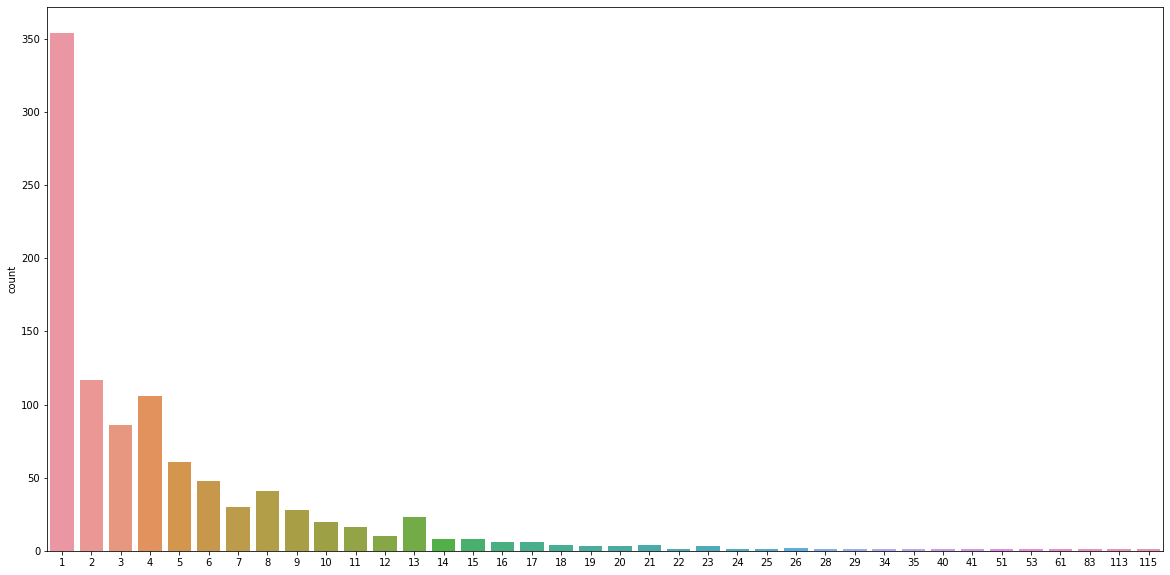

In [184]:
plt.figure(figsize=(20, 10))
sns.countplot(assem_frame.object_num.values)
plt.show()

In [185]:
from itertools import chain

num_object_per_images = assem_frame.object_num

image_data = pd.DataFrame({
    'filename': np.repeat(assem_frame['filename'], num_object_per_images), 
    'segmented': np.repeat(assem_frame['segmented'], num_object_per_images), 
    'object': chain.from_iterable(assem_frame['object'].values), 
    'width': np.repeat(assem_frame['size.width'], num_object_per_images),
    'height': np.repeat(assem_frame['size.height'], num_object_per_images),
    'depth': np.repeat(assem_frame['size.depth'], num_object_per_images)
})
image_data.reset_index(inplace=True, drop=True)

In [186]:
image_data

,filename,segmented,object,width,height,depth
0,maksssksksss0.png,0,"{'name': 'without_mask', 'pose': 'Unspecified'...",512,366,3
1,maksssksksss0.png,0,"{'name': 'with_mask', 'pose': 'Unspecified', '...",512,366,3
2,maksssksksss0.png,0,"{'name': 'without_mask', 'pose': 'Unspecified'...",512,366,3
3,maksssksksss1.png,0,"{'name': 'with_mask', 'pose': 'Unspecified', '...",400,156,3
4,maksssksksss1.png,0,"{'name': 'with_mask', 'pose': 'Unspecified', '...",400,156,3
...,...,...,...,...,...,...
5021,shutterstock_editorial_10536831j_2e16d0ba_fill...,0,"{'name': 'with_mask', 'pose': 'Unspecified', '...",416,416,3
5022,shutterstock_editorial_10536831j_2e16d0ba_fill...,0,"{'name': 'with_mask', 'pose': 'Unspecified', '...",416,416,3
5023,shutterstock_editorial_10536831j_2e16d0ba_fill...,0,"{'name': 'with_mask', 'pose': 'Unspecified', '...",416,416,3
5024,shutterstock_editorial_10536831j_2e16d0ba_fill...,0,"{'name': 'with_mask', 'pose': 'Unspecified', '...",416,416,3


In [187]:
objects = pd.DataFrame(image_data.object.map(dict).tolist())

data = pd.concat([image_data, objects], axis=1)
data.drop(columns='object', inplace=True)

In [188]:
data.describe()

,filename,segmented,width,height,depth,name,pose,truncated,occluded,difficult,bndbox
count,5026,5026,5026,5026,5026,5026,5026,5026,5026,5026,5026
unique,1002,1,40,105,1,3,1,1,1,1,5025
top,maksssksksss603.png,0,400,267,3,with_mask,Unspecified,0,0,0,"{'xmin': '276', 'ymin': '115', 'xmax': '286', ..."
freq,115,5026,3684,986,5026,4038,5026,5026,5026,5026,2


In [189]:
processing_data = data.drop(columns='segmented', inplace=False)
processing_data = processing_data.drop(columns='truncated', inplace=False)
processing_data = processing_data.drop(columns='occluded', inplace=False)
processing_data = processing_data.drop(columns='difficult', inplace=False)
processing_data = processing_data.drop(columns='pose', inplace=False)

In [190]:
processing_data

,filename,width,height,depth,name,bndbox
0,maksssksksss0.png,512,366,3,without_mask,"{'xmin': '79', 'ymin': '105', 'xmax': '109', '..."
1,maksssksksss0.png,512,366,3,with_mask,"{'xmin': '185', 'ymin': '100', 'xmax': '226', ..."
2,maksssksksss0.png,512,366,3,without_mask,"{'xmin': '325', 'ymin': '90', 'xmax': '360', '..."
3,maksssksksss1.png,400,156,3,with_mask,"{'xmin': '321', 'ymin': '34', 'xmax': '354', '..."
4,maksssksksss1.png,400,156,3,with_mask,"{'xmin': '224', 'ymin': '38', 'xmax': '261', '..."
...,...,...,...,...,...,...
5021,shutterstock_editorial_10536831j_2e16d0ba_fill...,416,416,3,with_mask,"{'xmin': '175', 'xmax': '193', 'ymin': '188', ..."
5022,shutterstock_editorial_10536831j_2e16d0ba_fill...,416,416,3,with_mask,"{'xmin': '212', 'xmax': '235', 'ymin': '192', ..."
5023,shutterstock_editorial_10536831j_2e16d0ba_fill...,416,416,3,with_mask,"{'xmin': '192', 'xmax': '234', 'ymin': '208', ..."
5024,shutterstock_editorial_10536831j_2e16d0ba_fill...,416,416,3,with_mask,"{'xmin': '256', 'xmax': '280', 'ymin': '189', ..."


In [191]:
objects = pd.DataFrame(processing_data.bndbox.map(dict).tolist())
objects
# data = pd.concat([image_data, objects], axis=1)
# data.drop(columns='object', inplace=True)

,xmin,ymin,xmax,ymax
0,79,105,109,142
1,185,100,226,144
2,325,90,360,141
3,321,34,354,69
4,224,38,261,73
...,...,...,...,...
5021,175,188,193,206
5022,212,192,235,215
5023,192,208,234,253
5024,256,189,280,218


In [192]:
processing_data_box = pd.concat([processing_data, objects], axis=1)
processing_data_box.drop(columns='bndbox', inplace=True)

In [193]:
processing_data_box

,filename,width,height,depth,name,xmin,ymin,xmax,ymax
0,maksssksksss0.png,512,366,3,without_mask,79,105,109,142
1,maksssksksss0.png,512,366,3,with_mask,185,100,226,144
2,maksssksksss0.png,512,366,3,without_mask,325,90,360,141
3,maksssksksss1.png,400,156,3,with_mask,321,34,354,69
4,maksssksksss1.png,400,156,3,with_mask,224,38,261,73
...,...,...,...,...,...,...,...,...,...
5021,shutterstock_editorial_10536831j_2e16d0ba_fill...,416,416,3,with_mask,175,188,193,206
5022,shutterstock_editorial_10536831j_2e16d0ba_fill...,416,416,3,with_mask,212,192,235,215
5023,shutterstock_editorial_10536831j_2e16d0ba_fill...,416,416,3,with_mask,192,208,234,253
5024,shutterstock_editorial_10536831j_2e16d0ba_fill...,416,416,3,with_mask,256,189,280,218


In [194]:
processing_data_box.to_csv('data.csv', index=False)

In [195]:
data = pd.read_csv('data.csv')

In [211]:
data.describe()

,width,height,depth,xmin,ymin,xmax,ymax,box_size
count,5026.000000,5026.000000,5026.0,5026.000000,5026.000000,5026.000000,5026.000000,5026.000000
mean,397.935137,297.812973,3.0,183.657979,95.252487,216.796060,133.351771,2224.024075
std,33.051213,74.111918,0.0,105.297179,55.952465,104.059338,72.673990,5009.785204
min,193.000000,156.000000,3.0,1.000000,1.000000,8.000000,6.000000,0.000000
25%,400.000000,226.000000,3.0,96.000000,54.000000,135.000000,81.000000,255.000000
50%,400.000000,267.000000,3.0,179.500000,85.000000,216.000000,119.000000,621.000000
75%,400.000000,400.000000,3.0,268.000000,126.000000,297.000000,172.000000,1767.000000
max,600.000000,600.000000,3.0,569.000000,330.000000,592.000000,495.000000,106829.000000


In [197]:
data.info

<bound method DataFrame.info of                                                filename  width  ...  xmax  ymax
0                                     maksssksksss0.png    512  ...   109   142
1                                     maksssksksss0.png    512  ...   226   144
2                                     maksssksksss0.png    512  ...   360   141
3                                     maksssksksss1.png    400  ...   354    69
4                                     maksssksksss1.png    400  ...   261    73
...                                                 ...    ...  ...   ...   ...
5021  shutterstock_editorial_10536831j_2e16d0ba_fill...    416  ...   193   206
5022  shutterstock_editorial_10536831j_2e16d0ba_fill...    416  ...   235   215
5023  shutterstock_editorial_10536831j_2e16d0ba_fill...    416  ...   234   253
5024  shutterstock_editorial_10536831j_2e16d0ba_fill...    416  ...   280   218
5025  shutterstock_editorial_10536831j_2e16d0ba_fill...    416  ...   360   284

[5026 r

In [206]:
data.head()

,filename,width,height,depth,name,xmin,ymin,xmax,ymax,box_size
0,maksssksksss0.png,512,366,3,without_mask,79,105,109,142,1110
1,maksssksksss0.png,512,366,3,with_mask,185,100,226,144,1804
2,maksssksksss0.png,512,366,3,without_mask,325,90,360,141,1785
3,maksssksksss1.png,400,156,3,with_mask,321,34,354,69,1155
4,maksssksksss1.png,400,156,3,with_mask,224,38,261,73,1295


In [205]:
data['box_size'] = (data.xmax-data.xmin)*(data.ymax-data.ymin)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


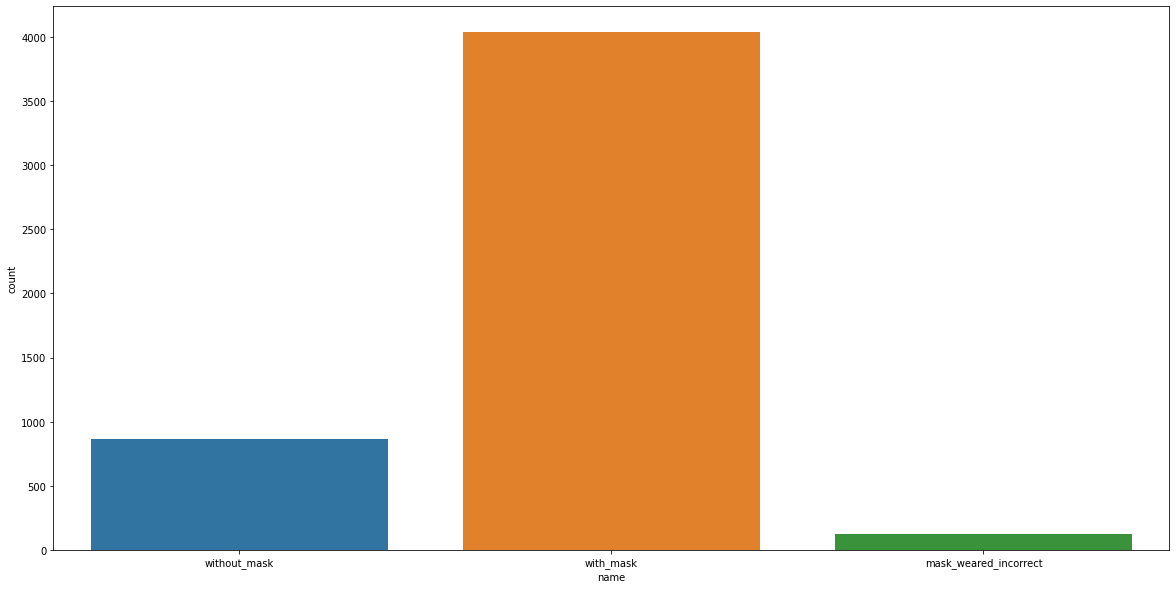

In [199]:
plt.figure(figsize=(20, 10))
sns.countplot(data.name)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


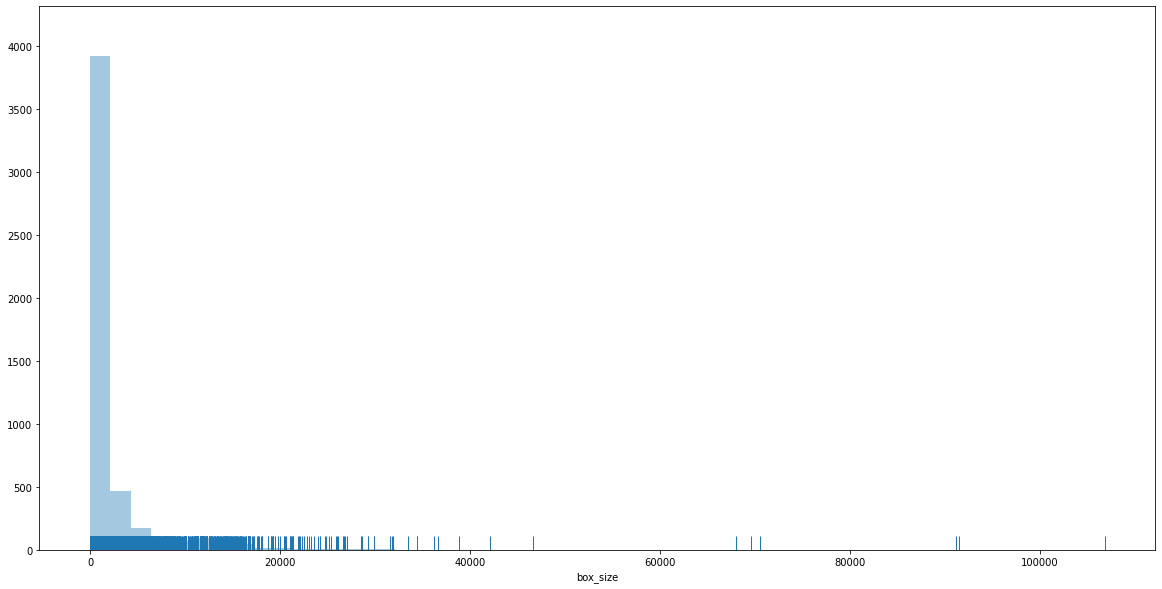

In [227]:
plt.figure(figsize=(20, 10))
ax = sns.distplot(data.box_size, rug = True, kde = False)

plt.show()